In [195]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import SGD,Adam

In [ ]:
from tensorflow.keras import utils  #用於分類資料轉換等 Keras 工具
np.random.seed(10) #設定隨機種子，讓每次程式產生的隨機值都一致

In [197]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

# **資料預處理**

In [ ]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = cifar10.load_data()

In [ ]:
x_Train_normalize = x_train_image/255
x_Test_normalize = x_test_image/255

In [ ]:
y_Train_OneHot = utils.to_categorical(y_train_label)
y_Test_OneHot = utils.to_categorical(y_test_label)

In [ ]:
x_train_image.shape

(50000, 32, 32, 3)

# **模型建立**

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),padding='same',
         input_shape=(32,32,3),
         activation='relu'))

In [ ]:
model.add(Conv2D(16,(3,3),padding='same',
         activation='relu'))

In [ ]:
model.add(MaxPool2D())

In [ ]:
model.add(Conv2D(32,(3,3),padding='same',
         activation='relu'))

In [ ]:
model.add(Conv2D(32,(3,3),padding='same',
         activation='relu'))

In [ ]:
model.add(MaxPool2D())

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [ ]:
print(model.summary())  # 檢查用

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,146 (145.10 KB)

 Trainable params: 37,146 (145.10 KB)

 Non-trainable params: 0 (0.00 B)

None


# **訓練模型**

In [ ]:
model.compile(
    loss='categorical_crossentropy',  # 損失函數
    optimizer= Adam(learning_rate = 0.001),                 # 最佳化器
    metrics=['accuracy']             # 評估指標
)

In [ ]:
train_history = model.fit(
    x = x_Train_normalize,         # 訓練資料（特徵）→ 已經標準化
    y = y_Train_OneHot,            # 訓練標籤（目標）→ One-hot 編碼
    validation_split = 0.2,        # 20% 訓練資料作為驗證資料（不用額外給 validation set）
    epochs = 20,                   # 訓練 10 輪（整份資料訓練 10 次）
    batch_size = 128,              # 每批次送入 400 筆資料
    verbose = 2,                   # 顯示訓練過程資訊（2 表示精簡模式：每輪顯示一行）
)

Epoch 1/20
313/313 - 6s - 21ms/step - accuracy: 0.8070 - loss: 0.5611 - val_accuracy: 0.7144 - val_loss: 0.8678
Epoch 2/20
313/313 - 3s - 8ms/step - accuracy: 0.8136 - loss: 0.5386 - val_accuracy: 0.7219 - val_loss: 0.8595
Epoch 3/20
313/313 - 5s - 15ms/step - accuracy: 0.8149 - loss: 0.5266 - val_accuracy: 0.7137 - val_loss: 0.8732
Epoch 4/20
313/313 - 2s - 8ms/step - accuracy: 0.8218 - loss: 0.5110 - val_accuracy: 0.7233 - val_loss: 0.8660
Epoch 5/20
313/313 - 2s - 6ms/step - accuracy: 0.8267 - loss: 0.5000 - val_accuracy: 0.7130 - val_loss: 0.9031
Epoch 6/20
313/313 - 2s - 7ms/step - accuracy: 0.8312 - loss: 0.4864 - val_accuracy: 0.7161 - val_loss: 0.8917
Epoch 7/20
313/313 - 2s - 7ms/step - accuracy: 0.8346 - loss: 0.4740 - val_accuracy: 0.7134 - val_loss: 0.9553
Epoch 8/20
313/313 - 2s - 6ms/step - accuracy: 0.8365 - loss: 0.4658 - val_accuracy: 0.7186 - val_loss: 0.9058
Epoch 9/20
313/313 - 3s - 8ms/step - accuracy: 0.8418 - loss: 0.4535 - val_accuracy: 0.7071 - val_loss: 0.9862

# **以圖形顯示訓練過程**

In [ ]:
train_history.history

{'accuracy': [0.8069750070571899,
  0.8136249780654907,
  0.8148999810218811,
  0.8217999935150146,
  0.8267499804496765,
  0.8312249779701233,
  0.8346250057220459,
  0.8364750146865845,
  0.8418499827384949,
  0.8443499803543091,
  0.850724995136261,
  0.8523250222206116,
  0.855400025844574,
  0.862500011920929,
  0.862975001335144,
  0.8659999966621399,
  0.8690249919891357,
  0.8722249865531921,
  0.8767750263214111,
  0.8799499869346619],
 'loss': [0.5611047148704529,
  0.5385913848876953,
  0.5266106128692627,
  0.5109689235687256,
  0.5000086426734924,
  0.48638442158699036,
  0.47399452328681946,
  0.46584251523017883,
  0.4535253942012787,
  0.4454589784145355,
  0.43198519945144653,
  0.4213695824146271,
  0.41250863671302795,
  0.398558646440506,
  0.39215120673179626,
  0.38367825746536255,
  0.37260857224464417,
  0.3632809519767761,
  0.354835569858551,
  0.346078097820282],
 'val_accuracy': [0.7143999934196472,
  0.7218999862670898,
  0.713699996471405,
  0.723299980163

In [ ]:
import matplotlib.pyplot as plt

# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

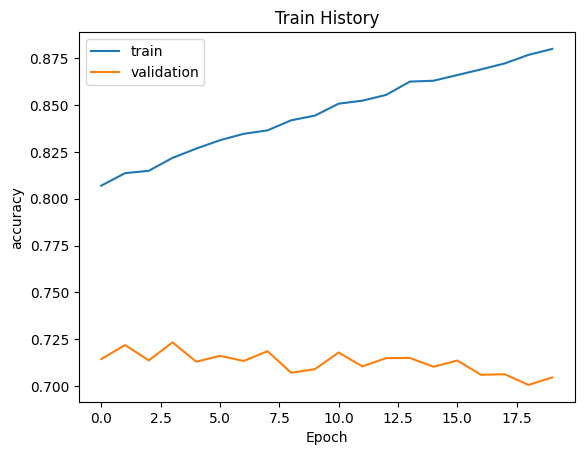

In [198]:
show_train_history(train_history,'accuracy','val_accuracy')

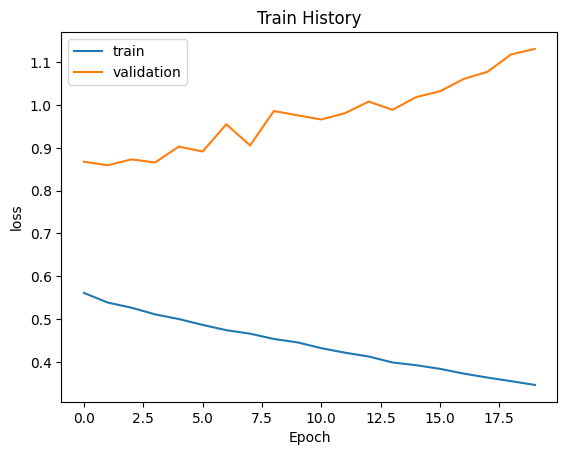

In [199]:
show_train_history(train_history,'loss','val_loss')

# **評估模型準確率**

In [ ]:
scores = model.evaluate(x_test, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7025 - loss: 1.1375

accuracy= 0.6991000175476074


# **進行預測**

In [ ]:
class_names = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
prediction=model.predict(x_test_image)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
predicted_lable = np.argmax(prediction[6])
predicted_lable

np.int64(5)

神經網路預測是： dog
實際是： car


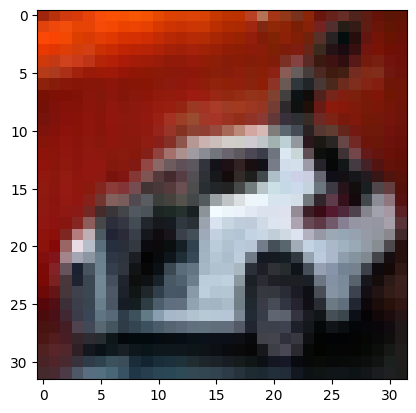

In [200]:
print('神經網路預測是：', class_names[predicted_lable])
print('實際是：', class_names[y_test_label[6].item()])
plt.imshow(x_test_image[6], cmap='Greys');  # 測試圖片需reshape為原來32x32

In [202]:
# 一次呈現數張測試資料(圖片)、預測結果與真實結果，最多25張，預設10張
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx])
        title = "label=" + str(class_names[labels[idx][0]]) + "\n"
        if prediction is not None:
            title += "predict=" + str(class_names[np.argmax(prediction[idx])])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

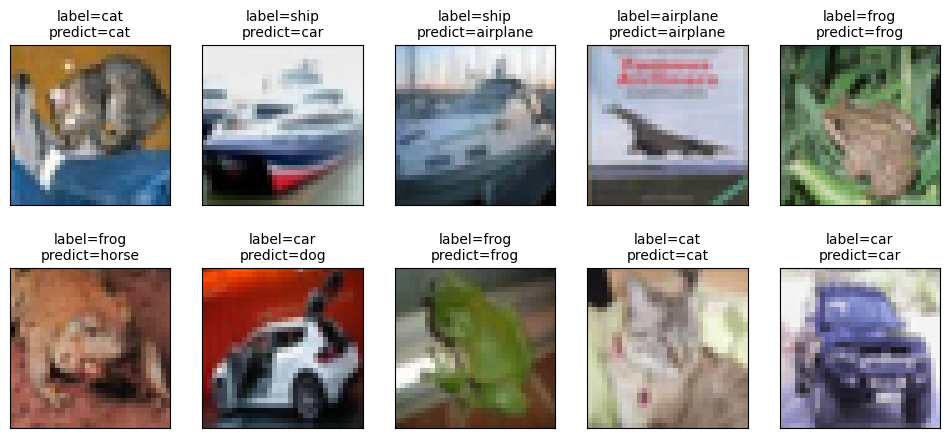

In [203]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# **confusion matrix (混淆矩陣)**

In [205]:
import pandas as pd
# 將10000個預測結果一一轉換為
predicted_labels = np.argmax(prediction, axis=1)

# Now use predicted_labels in crosstab
pd.crosstab(y_test_label.ravel(), predicted_labels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,862,14,2,13,11,3,5,19,30,41
1,133,711,1,8,1,2,3,10,16,115
2,283,25,218,107,42,73,65,133,14,40
3,152,20,11,414,23,117,41,99,30,93
4,207,19,49,128,202,68,84,175,19,49
5,100,14,15,217,16,425,27,125,17,44
6,93,29,25,106,19,37,567,34,45,45
7,97,20,13,38,12,52,6,688,9,65
8,473,28,1,11,2,0,2,10,388,85


In [207]:
# 每一筆測試資料的真實結果標籤(label)與預測結果標籤(predict)的表格(df)

df = pd.DataFrame({'label': y_test_label.ravel(), 'predict': predicted_labels})
df[:10] # 表格前10筆測試資料

,label,predict
0,3,3
1,8,1
2,8,0
3,0,0
4,6,6
5,6,7
6,1,5
7,6,6
8,3,3
9,1,1


In [208]:
df[(df.label==5)&(df.predict==3)]  # 真實標籤為5，卻預測為3

,label,predict
16,5,3
31,5,3
39,5,3
101,5,3
155,5,3
...,...,...
9661,5,3
9761,5,3
9823,5,3
9976,5,3


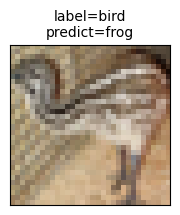

In [209]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

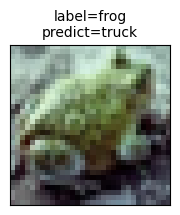

In [210]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

In [211]:
from google.colab import drive

In [212]:
drive.mount('/content/drive')

Mounted at /content/drive


In [213]:
%cd 'content/drive/My Drive/Colab Notebooks'

[Errno 2] No such file or directory: 'content/drive/My Drive/Colab Notebooks'
/content


In [214]:
model.save('/content/drive/My Drive/hw3_model.keras')

In [215]:
!ls "/content/drive/My Drive"

 0785._javscat_PGFD-038.mp4
 106級_深度自助旅遊網站建置-臺灣為例_20200706_final.docx
'1120812 CWT-64'
'1120812 CWT-64 (1)'
 112233
'1209 10'
 18校报录比22-24.rar
 19148365-258e-4894-8a50-8b0f4b8b664f.pdf
 3B032089阮彥翔
 3B032089阮彥翔HW1
 3B032089阮彥翔.zip
 812CWT
 818-FF41
 919週記.gdoc
 ac8276b06a01cc92.docx
 C14-租約-230701-240630.xlsx
'Colab Notebooks'
 DIP
 「DSC_9844.JPG」のコピー
 「DSC_9849.JPG」のコピー
 ERP配銷模組精選題庫.pdf
 FF42
'Google Earth'
 hw3_model.keras
 IMG_0245.png
 IMG_6077.HEIC
 IMG_6078.HEIC
 IMG_6079.HEIC
 IMG_6080.HEIC
 IMG_6081.heic
 IMG_6082.heic
 IMG_6083.HEIC
 IMG_6088.heic
 IMG_6089.heic
 IMG_6090.HEIC
 IMG_6091.HEIC
 IMG_6092.HEIC
 IMG_6093.HEIC
 IMG_6094.HEIC
 IMG_6095.HEIC
 IMG_6096.HEIC
 IMG_6097.HEIC
 IMG_6098.heic
 IMG_6099.heic
 IMG_6100.HEIC
 IMG_6101.HEIC
 IMG_6102.HEIC
 IMG_6103.heic
 IMG_6104.HEIC
 IMG_6105.HEIC
 IMG_6106.heic
 IMG_6107.heic
 IMG_6108.heic
 IMG_6109.HEIC
 IMG_6110.HEIC
 IMG_6111.HEIC
 IMG_6112.heic
 IMG_6113.heic
 IMG_6114.HEIC
 IMG_6115.heic
 IMG_6117.HEIC
 IMG_6118.HEIC
